# p.16 Combining Algos with a Vote

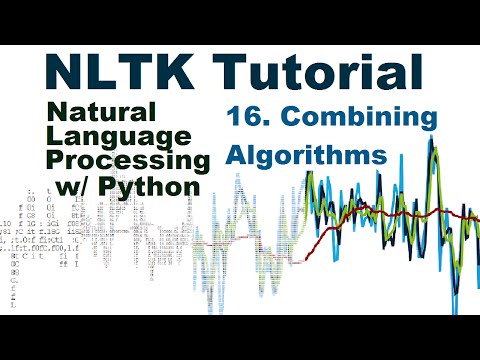

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('vlTQLb_a564')

## 1. A combined "vote" classifier

Usually a combined "vote" classifier contains an odd number of simple classifiers, but if it contains an even number of simple classifiers, we need a way for breaking the ties.

(1) Each type of simple classifier returns one "vote".

(2) The combined classifier will count the votes and generate the final result with a confidence level.

## 2. Example

In [5]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
import pickle

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI
from statistics import mode

class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
        
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        choice_votes = votes.count(mode(votes))
        conf = choice_votes/len(votes)
        
        return conf

# Oneliner which is equivalent to 
# documents = []
# for category in movie_reviews.categories():
#     for fileid in movie_reviews.fileids(category):
#         documents.append(list(movie_reviews(fileid)), category)

# Load 2000 movie reviews where 1000 are positive and the other 1000 are negative.
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

# Add all the words to a single list.
all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())
    
all_words = nltk.FreqDist(all_words)

# Restrict our 'features' to the most common 3000 words.
word_features = list(all_words.keys())[:3000]

# Check if each of the most common 3000 words is present in one movie review.
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
        
    return features

# print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

# Label the 'features' in all the movie reviews.
featuresets = [(find_features(rev), category) for (rev, category) in documents]

# Partition the entire data set into training set and test set.
training_set = featuresets[:1900]
testing_set = featuresets[1900:]

## 
## Trained naive Bayes classifer
##
classifier_f = open("naivebayes.pickle", "rb")
classifier = pickle.load(classifier_f)
classifier_f.close()

print("Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

##
## Scikit-Learn MultinomialNB
##
MultinomialNB_classifier = SklearnClassifier(MultinomialNB())
MultinomialNB_classifier.train(training_set)

print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MultinomialNB_classifier, testing_set))*100)

##
## Scikit-Learn GaussianNB
##
# GaussianNB_classifier = SklearnClassifier(GaussianNB())
# GaussianNB_classifier.train(training_set)

# print("GaussianNB_classifier accuracy percent:", (nltk.classify.accuracy(GaussianNB_classifier, testing_set))*100)

##
## Scikit-Learn BernoulliNB
##
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)

print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

##
## Scikit-Learn LogisticRegression
##
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)

print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

##
## Scikit-Learn SGDClassifier
##
SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)

print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

##
## Scikit-Learn SVC
##
# The performance of the classic SVC is poor, so it is NOT used.
#SVC_classifier = SklearnClassifier(SVC())
#SVC_classifier.train(training_set)

#print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_classifier, testing_set))*100)

##
## Scikit-Learn LinearSVC
##
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)

print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

##
## Scikit-Learn NuSVC
##
NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)

print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)

voted_classifier = VoteClassifier(classifier, 
                                  MultinomialNB_classifier, 
                                  BernoulliNB_classifier, 
                                  LogisticRegression_classifier, 
                                  SGDClassifier_classifier, 
                                  LinearSVC_classifier, 
                                  NuSVC_classifier)
print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)

print("Classification: ", voted_classifier.classify(testing_set[0][0]), 
      "Confidence %: ", voted_classifier.confidence(testing_set[0][0])*100)
print("Classification: ", voted_classifier.classify(testing_set[1][0]), 
      "Confidence %: ", voted_classifier.confidence(testing_set[1][0])*100)
print("Classification: ", voted_classifier.classify(testing_set[2][0]), 
      "Confidence %: ", voted_classifier.confidence(testing_set[2][0])*100)
print("Classification: ", voted_classifier.classify(testing_set[3][0]), 
      "Confidence %: ", voted_classifier.confidence(testing_set[3][0])*100)
print("Classification: ", voted_classifier.classify(testing_set[4][0]), 
      "Confidence %: ", voted_classifier.confidence(testing_set[4][0])*100)
print("Classification: ", voted_classifier.classify(testing_set[5][0]), 
      "Confidence %: ", voted_classifier.confidence(testing_set[5][0])*100)


Naive Bayes Algo accuracy percent: 92.0
Most Informative Features
                   sucks = True              neg : pos    =     10.6 : 1.0
               stretched = True              neg : pos    =     10.3 : 1.0
                  annual = True              pos : neg    =      9.7 : 1.0
                 frances = True              pos : neg    =      8.4 : 1.0
           unimaginative = True              neg : pos    =      8.3 : 1.0
             silverstone = True              neg : pos    =      7.6 : 1.0
              schumacher = True              neg : pos    =      7.4 : 1.0
                  regard = True              pos : neg    =      7.0 : 1.0
                 idiotic = True              neg : pos    =      7.0 : 1.0
                    mena = True              neg : pos    =      7.0 : 1.0
                  suvari = True              neg : pos    =      7.0 : 1.0
                  sexist = True              neg : pos    =      7.0 : 1.0
               atrocious = True   

/home/renwei/anaconda3/envs/nltk/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier_classifier accuracy percent: 79.0
LinearSVC_classifier accuracy percent: 73.0
NuSVC_classifier accuracy percent: 81.0
voted_classifier accuracy percent: 84.0
Classification:  neg Confidence %:  100.0
Classification:  pos Confidence %:  100.0
Classification:  pos Confidence %:  100.0
Classification:  pos Confidence %:  100.0
Classification:  pos Confidence %:  100.0
Classification:  neg Confidence %:  100.0
